In [1]:
import os
import numpy as np
import matplotlib_inline

import matplotlib.pyplot as plt
from matplotlib import font_manager

from pyutils import styles as sy

In [2]:
def make_centers(n):
    import random
    def make_number():
        coin = round(random.random() * 10) % 2

        rnd = random.random()

        if coin == 0:
            rnd = rnd * -1
        elif coin == 1:
            pass

        return round(rnd, 3)

    centers = []
    for i in range(n):
        center_coords = []
        center_coords.append(make_number())
        center_coords.append(make_number())

        centers.append(center_coords)

    return centers

#centers = make_centers(4)

In [3]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[-0.775, -0.748], [-0.181, 0.904], [-0.221, -0.914], [0.185, 0.133]]

X, labels_true = make_blobs(
    n_samples=175000, centers=centers, cluster_std=0.25, random_state=40
)

X = StandardScaler().fit_transform(X)
x = X[:, 0]
y = X[:, 1]

unique_cats = np.unique(labels_true)
color_dict = {cat: sy.mode20b[i] for i, cat in enumerate(unique_cats)}

In [118]:
plt.rcParams.find_all('cap')

RcParams({'boxplot.capprops.color': 'black',
          'boxplot.capprops.linestyle': '-',
          'boxplot.capprops.linewidth': 1.0,
          'boxplot.showcaps': True,
          'errorbar.capsize': 0.0,
          'lines.dash_capstyle': <CapStyle.butt: 'butt'>,
          'lines.solid_capstyle': <CapStyle.projecting: 'projecting'>})

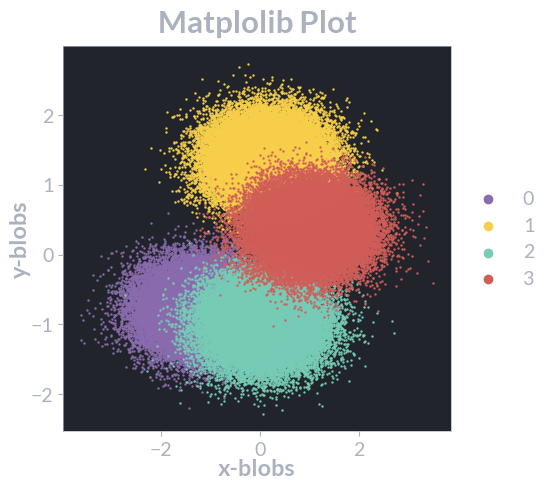

In [9]:
linecolor = '#ABB2BF'
text_col = '#ABB2BF'
text_size = 14
main_factor = 1.6
label_factor = 1.2

rcDict_2 = {
    "font.family": "Lato",
    "font.size": text_size,
    "font.weight": "regular",
    "axes.linewidth": 0.5,
    "axes.titlesize": text_size * main_factor,
    "axes.titlepad": 10,
    "axes.titleweight": "bold",
    "axes.titlecolor": text_col,
    "axes.titlelocation": "center",
    "axes.edgecolor": linecolor,
    "xtick.color": linecolor,
    "ytick.color": linecolor,
    "xtick.labelcolor": text_col,
    "ytick.labelcolor": text_col,
    
    "axes.facecolor": "#21252B",  # '#21252B', # color of plotting area
    
    "axes.labelsize": text_size * label_factor,
    "axes.labelweight": "bold",
    "xaxis.labellocation": "center",
    "axes.labelpad": 0,
    "axes.labelcolor": text_col,
    "legend.labelcolor": text_col,
    #'savefig.transparent': True,
    #'figure.facecolor': (0,0,0,0)
}

plt.rcParams.update(rcDict_2)

matplotlib_inline.backend_inline.set_matplotlib_formats('png', bbox_inches='tight', metadata={'needs_background': None})
#from IPython.display import set_matplotlib_formats
# Override 'bbox_inches' for inline figures
#set_matplotlib_formats('png', bbox_inches=None, savefig_transparent= False)


fig, ax = plt.subplots(figsize=[5,5], dpi=100)

ax.set_title('Matplolib Plot')
ax.set_ylabel('y-blobs')
ax.set_xlabel('x-blobs')

for category in color_dict:
    mask = (labels_true == category)
    ax.scatter(x[mask], y[mask], c=color_dict[category], s=0.5, alpha=1, antialiased=False)

for label in unique_cats:
    ax.scatter([], [], c=color_dict[label], label=label)
    ax.legend(
        frameon=False,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        ncol=(1 if len(unique_cats) <= 14 else 2 if len(unique_cats) <= 30 else 3)
    )

fig.patch.set_alpha(0.0)
#ax.patch.set_alpha(0.0)

# Explicitly set the metadata to force transparency in Jupyter inline rendering
#def force_transparency(fig):
from IPython.display import display
display(fig, metadata={'needs_background': None})

plt.close(fig)
#force_transparency(fig)

#plt.show()

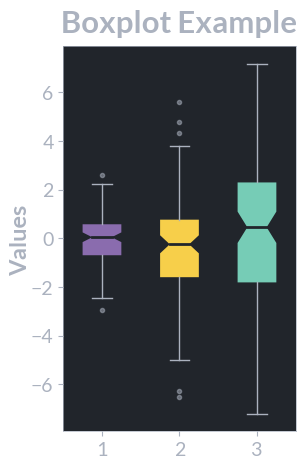

In [120]:
import matplotlib.pyplot as plt
import numpy as np

# Generate random data for the boxplot
# np.random.seed(10)
#data = [np.random.normal(0, std, 100) for std in range(1, 4)]


fig, ax = plt.subplots(figsize=[3,5], dpi=100)

# Create a boxplot
boxplot = ax.boxplot(
    data,
    vert=True,
    notch=True,
    patch_artist=True,
    widths=[0.5,0.5,0.5],
    medianprops={'color': '#21252B', 'linewidth': 2, "solid_capstyle": "projecting"},
    boxprops={"color": text_col, 'linewidth': 0},
    whiskerprops={"color": text_col},
    capprops={"color": text_col},
    flierprops={"markeredgecolor": text_col, 'markersize': 3, 'markerfacecolor': text_col, "alpha": 0.5, "marker": "o"},
)

# Customize box colors
colors = sy.mode20b
for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)
    #patch.set_edgecolor('black')  # Optional: set the edge color to black


# Set labels and title
# ax.set_xticks([1, 2, 3], ['Group 1', 'Group 2', 'Group 3'])
ax.set_title('Boxplot Example')
ax.set_ylabel('Values')

fig.patch.set_alpha(0.0)
from IPython.display import display
display(fig, metadata={'needs_background': None})
plt.close(fig)

In [3]:
rcPrms = plt.rcParams

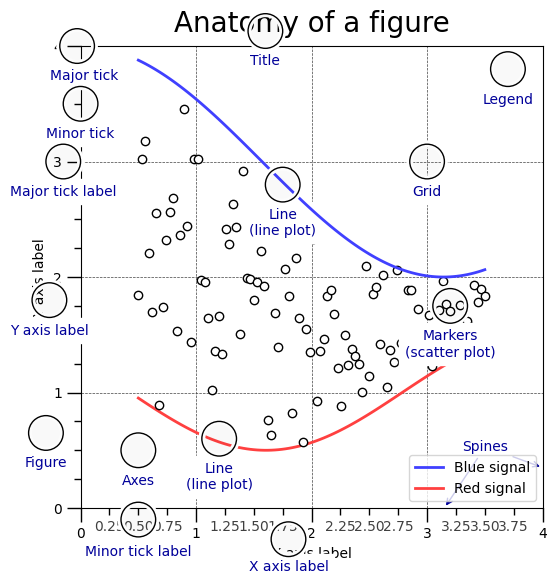

In [19]:
#plt.rcParams.update(rcDict)
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter

np.random.seed(123)

X = np.linspace(0.5, 3.5, 100)
Y1 = 3 + np.cos(X)
Y2 = 1 + np.cos(1 + X / 0.75) / 2
Y3 = np.random.uniform(Y1, Y2, len(X))

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(1, 1, 1, aspect=1)


def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x


ax.xaxis.set_major_locator(MultipleLocator(1.000))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

ax.tick_params(which="major", width=1.0)
ax.tick_params(which="major", length=10)
ax.tick_params(which="minor", width=1.0, labelsize=10)
ax.tick_params(which="minor", length=5, labelsize=10, labelcolor="0.25")

ax.grid(linestyle="--", linewidth=0.5, color=".25", zorder=-10)

ax.plot(X, Y1, c=(0.25, 0.25, 1.00), lw=2, label="Blue signal", zorder=10)
ax.plot(X, Y2, c=(1.00, 0.25, 0.25), lw=2, label="Red signal")
ax.plot(X, Y3, linewidth=0, marker="o", markerfacecolor="w", markeredgecolor="k")

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment="bottom")
ax.set_xlabel("X axis label")
ax.set_ylabel("Y axis label")

ax.legend()


def circle(x, y, radius=0.15):
    from matplotlib.patches import Circle
    from matplotlib.patheffects import withStroke

    circle = Circle(
        (x, y),
        radius,
        clip_on=False,
        zorder=10,
        linewidth=1,
        edgecolor="black",
        facecolor=(0, 0, 0, 0.0125),
        path_effects=[withStroke(linewidth=5, foreground="w")],
    )
    ax.add_artist(circle)

def text(x, y, text):
    ax.text(
        x,
        y,
        text,
        backgroundcolor="white",
        # fontname="Yanone Kaffeesatz", fontsize="large",
        ha="center",
        va="top",
        weight="regular",
        color="#000099",
    )

def add_annotated_circles():
    # Minor tick
    circle(0.50, -0.10)
    text(0.50, -0.32, "Minor tick label")

    # Major tick
    circle(-0.03, 4.00)
    text(0.03, 3.80, "Major tick")

    # Minor tick
    circle(0.00, 3.50)
    text(0.00, 3.30, "Minor tick")

    # Major tick label
    circle(-0.15, 3.00)
    text(-0.15, 2.80, "Major tick label")

    # X Label
    circle(1.80, -0.27)
    text(1.80, -0.45, "X axis label")

    # Y Label
    circle(-0.27, 1.80)
    text(-0.27, 1.6, "Y axis label")

    # Title
    circle(1.60, 4.13)
    text(1.60, 3.93, "Title")

    # Blue plot
    circle(1.75, 2.80)
    text(1.75, 2.60, "Line\n(line plot)")

    # Red plot
    circle(1.20, 0.60)
    text(1.20, 0.40, "Line\n(line plot)")

    # Scatter plot
    circle(3.20, 1.75)
    text(3.20, 1.55, "Markers\n(scatter plot)")

    # Grid
    circle(3.00, 3.00)
    text(3.00, 2.80, "Grid")

    # Legend
    circle(3.70, 3.80)
    text(3.70, 3.60, "Legend")

    # Axes
    circle(0.5, 0.5)
    text(0.5, 0.3, "Axes")

    # Figure
    circle(-0.3, 0.65)
    text(-0.3, 0.45, "Figure")


add_annotated_circles()

color = "#000099"
ax.annotate(
    "Spines",
    xy=(4.0, 0.35),
    xytext=(3.3, 0.5),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

ax.annotate(
    "",
    xy=(3.15, 0.0),
    xytext=(3.45, 0.45),
    color=color,
    weight="regular",  # fontsize="large", fontname="Yanone Kaffeesatz",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color=color),
)

#plt.savefig("../../figures/anatomy/anatomy.pdf")
plt.show()


## bold tick labels

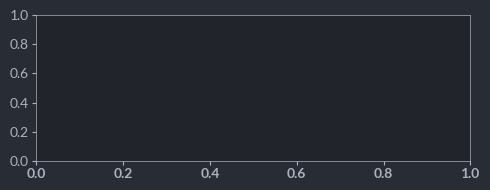

In [10]:
fig, ax = plt.subplots(figsize=(5, 2))

for label in ax.get_xaxis().get_ticklabels():
    label.set_fontweight("bold")

plt.tight_layout()
#plt.savefig("../../figures/anatomy/bold-ticklabel.pdf")
plt.show()


findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


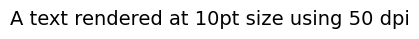

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


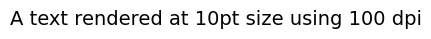

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


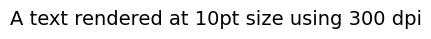

findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.
findfont: Font family 'Lato' not found.


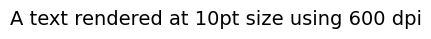

In [4]:
def figure(dpi):
    fig = plt.figure(figsize=(4.25, 0.2))
    ax = plt.subplot(1, 1, 1, frameon=False)
    plt.xticks([]), plt.yticks([])
    text = "A text rendered at 10pt size using {0} dpi".format(dpi)
    ax.text(
        0.5,
        0.5,
        text,
        fontname="Lato",
        ha="center",
        va="center",
        fontsize=14,
        fontweight="regular",
    )
    #plt.savefig("/Users/floraths/Code/scientific-visualization-book/figs/figure-dpi-{0:03d}.png".format(dpi), dpi=dpi)


figure(50)
figure(100)
figure(300)
figure(600)